# **EXPERIMENT 2**
## **Name**: Rishikesh Vadodaria
## **Roll no**: C114
## **Aim**: Implementation of Multi-Arm Bandit (MAB) Problem

## INSTALLATION

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
# Ads Dataset
df = pd.read_csv('Ads_Optimisation.csv')
df

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [3]:
# Epsilon with Ads
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def exploration_strategy(data):
    total_rewards = 0
    reward_history = []
    num_ads = data.shape[1]

    for user in range(len(data)):
        chosen_ad = np.random.randint(0, num_ads)
        reward = data.iloc[user, chosen_ad]
        total_rewards += reward
        reward_history.append(total_rewards)

    return reward_history

def exploitation_strategy(data):
    total_rewards = 0
    reward_history = []
    num_ads = data.shape[1]
    arm_counts = np.zeros(num_ads)
    arm_rewards = np.zeros(num_ads)

    for user in range(len(data)):
        chosen_ad = np.argmax(arm_rewards / (arm_counts + 1e-5))
        reward = data.iloc[user, chosen_ad]
        arm_counts[chosen_ad] += 1
        arm_rewards[chosen_ad] += reward
        total_rewards += reward
        reward_history.append(total_rewards)

    return reward_history

def fixed_exploration_then_exploitation(data, explore_steps):
    total_rewards = 0
    reward_history = []
    num_ads = data.shape[1]
    arm_counts = np.zeros(num_ads)
    arm_rewards = np.zeros(num_ads)

    for user in range(min(explore_steps, len(data))):
        chosen_ad = np.random.randint(0, num_ads)
        reward = data.iloc[user, chosen_ad]
        arm_counts[chosen_ad] += 1
        arm_rewards[chosen_ad] += reward
        total_rewards += reward
        reward_history.append(total_rewards)

    for user in range(explore_steps, len(data)):
        chosen_ad = np.argmax(arm_rewards / (arm_counts + 1e-5))
        reward = data.iloc[user, chosen_ad]
        arm_counts[chosen_ad] += 1
        arm_rewards[chosen_ad] += reward
        total_rewards += reward
        reward_history.append(total_rewards)

    return reward_history

def epsilon_greedy_strategy(data, epsilon):
    total_rewards = 0
    reward_history = []
    num_ads = data.shape[1]
    arm_counts = np.zeros(num_ads)
    arm_rewards = np.zeros(num_ads)

    for user in range(len(data)):
        if np.random.rand() < epsilon:
            chosen_ad = np.random.randint(0, num_ads)
        else:
            chosen_ad = np.argmax(arm_rewards / (arm_counts + 1e-5))

        reward = data.iloc[user, chosen_ad]
        arm_counts[chosen_ad] += 1
        arm_rewards[chosen_ad] += reward
        total_rewards += reward
        reward_history.append(total_rewards)

    return reward_history

def ucb_strategy(data):
    total_rewards = 0
    reward_history = []
    num_ads = data.shape[1]
    arm_counts = np.zeros(num_ads)
    arm_rewards = np.zeros(num_ads)

    for user in range(len(data)):
        if user < num_ads:
            chosen_ad = user
        else:
            ucb_values = arm_rewards / (arm_counts + 1e-5) + np.sqrt(2 * np.log(user + 1) / (arm_counts + 1e-5))
            chosen_ad = np.argmax(ucb_values)

        reward = data.iloc[user, chosen_ad]
        arm_counts[chosen_ad] += 1
        arm_rewards[chosen_ad] += reward
        total_rewards += reward
        reward_history.append(total_rewards)

    return reward_history

In [4]:
rewards_exploration = exploration_strategy(df)
rewards_exploitation = exploitation_strategy(df)
rewards_fixed_explore = fixed_exploration_then_exploitation(df, explore_steps=1000)
rewards_epsilon_greedy = epsilon_greedy_strategy(df, epsilon=0.1)
rewards_ucb = ucb_strategy(df)

In [5]:
# Identify the strategy with the highest reward
final_rewards = {
    "Exploration": rewards_exploration[-1],
    "Exploitation": rewards_exploitation[-1],
    "Fixed Explore-Exploit": rewards_fixed_explore[-1],
    "Epsilon-Greedy": rewards_epsilon_greedy[-1],
    "UCB": rewards_ucb[-1]
}

best_strategy = max(final_rewards, key=final_rewards.get)
print(f"The strategy with the highest reward is {best_strategy} with a reward of {final_rewards[best_strategy]}")

The strategy with the highest reward is Fixed Explore-Exploit with a reward of 2573


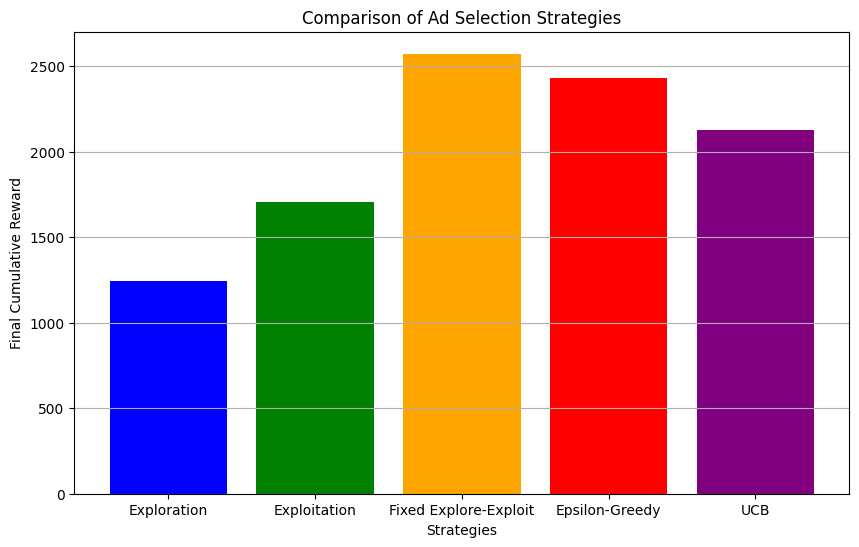

In [6]:
plt.figure(figsize=(10, 6))
plt.bar(['Exploration', 'Exploitation', 'Fixed Explore-Exploit', 'Epsilon-Greedy', 'UCB'],
        [rewards_exploration[-1], rewards_exploitation[-1], rewards_fixed_explore[-1], rewards_epsilon_greedy[-1], rewards_ucb[-1]],
        color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel('Strategies')
plt.ylabel('Final Cumulative Reward')
plt.title('Comparison of Ad Selection Strategies')
plt.grid(axis='y')
plt.show()